# COGS 108 Final Project

Team Members: Thalal Cassim, Kevin Chen, Yongji Shen, Ansuman Somasundaram, Wei Zeng

# Data Wrangling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# read from data set
suicide = pd.read_csv("./datasets/suicide-rates-overview-1985-to-2016.csv")

In [3]:
#select data from those following countries from our data set
selected = ["Canada","United States","United Kingdom","Australia",'Argentina',"Thailand","Sri Lanka","South Africa"]
tmp = list()   
for i in (suicide.index):
    for country in selected:
        if suicide.loc[i,"country"]==country:
            tmp.append(suicide.loc[i].tolist())
df = pd.DataFrame(columns = suicide.columns)
for i in tmp:
    df = df.append(pd.Series(i, index=suicide.columns), ignore_index=True)

In [4]:
#suicide.isnull().any()
suicideHDI = suicide.dropna()

dfHDI = df.dropna()

In [5]:
#sex,age,dgc,and hdi for all countries
suicide_sex = suicide[['country','year','sex','suicides_no','population']]
suicide_age = suicide[['country','year','age','suicides_no','population']]
suicide_gdp = suicide[['country','year','suicides_no','population',' gdp_for_year ($) ','gdp_per_capita ($)']]
suicide_hdi = suicideHDI[['country','year','suicides_no','population','HDI for year']]

In [6]:
#sex,age,dgc,and hdi for selected countries 
#("Canada","United States","United Kingdom","Australia",'Argentina',"Thailand","Sri Lanka","South Africa")
df_sex = df[['country','year','age','sex','suicides_no','population']]
df_age = df[['country','year','age','suicides_no','population']]
df_gdp = df[['country','year','suicides_no','population',' gdp_for_year ($) ','gdp_per_capita ($)']]
df_hdi = dfHDI[['country','year','suicides_no','population','HDI for year']]

In [7]:
year = df_sex['year'].unique()
#print(year)
count_male = 0
conut_female = 0
#df_sex
for i in range(len(df_sex)):
    if df_sex.loc[i,"country"] == 'Argentina':
        if df_sex.loc[i,"sex"] == "male":
            count_male += df_sex.loc[i,"suicides_no"]
        else:
            conut_female += df_sex.loc[i,"suicides_no"]
print(count_male)
print(conut_female)
df_sex

63893
18326


,country,year,age,sex,suicides_no,population
0,Argentina,1985,75+ years,male,202,363000
1,Argentina,1985,55-74 years,male,485,1997000
2,Argentina,1985,35-54 years,male,414,3346300
3,Argentina,1985,55-74 years,female,210,2304000
4,Argentina,1985,25-34 years,male,177,2234200
5,Argentina,1985,75+ years,female,41,537000
6,Argentina,1985,15-24 years,male,156,2415200
7,Argentina,1985,35-54 years,female,142,3355300
8,Argentina,1985,25-34 years,female,65,2185200
9,Argentina,1985,15-24 years,female,69,2354200


# Data Visualization

In [8]:
# Configure Seaborn
sns.set()
sns.set_context('talk')

# Set max number of displayed rows/columns
pd.options.display.max_rows = 7
pd.options.display.max_columns = 8

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

(0, 700)

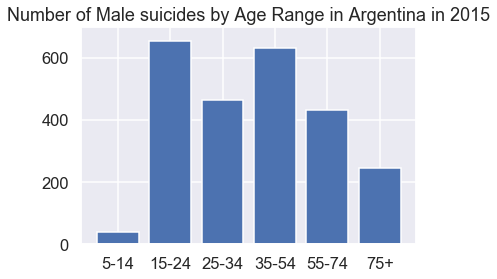

In [23]:
# Sex+Age vs Suicide Rates
# Age ranges: 5-14(range a), 15-24(range b), 25-34(range c), 35-54(range d), 55-74(range e), 75+(range f)
count_male_a = 0
count_male_b = 0
count_male_c = 0
count_male_d = 0
count_male_e = 0
count_male_f = 0

#df_sex
df_male_ARG = df_sex_argentina[df_sex_argentina['sex'] == 'male']

for index, row in df_male_ARG.iterrows():
    if(row['age'] == '75+ years'):
        count_male_f += row['suicides_no']
    elif(row['age'] == '55-74 years'):
        count_male_e += row['suicides_no']
    elif(row['age'] == '35-54 years'):
        count_male_d += row['suicides_no']
    elif(row['age'] == '25-34 years'):
        count_male_c += row['suicides_no']
    elif(row['age'] == '15-24 years'):
        count_male_b += row['suicides_no']
    elif(row['age'] == '5-14 years'):
        count_male_a += row['suicides_no']
    else:
        print("fail to find age within range!")
        
#print("count 5-14:", count_male_a, "count 15-24:", count_male_b, "count 25-34:", count_male_c, "count 35-54:", count_male_d, "count 55_74:", count_male_e, "count 75+:", count_male_f)

count_dict = {'Group':['5-14', '15-24', '25-34', '35-54', '55-74', '75+'], 
              'Count':[count_male_a, count_male_b, count_male_c, count_male_d, count_male_e, count_male_f]} 
counts = pd.DataFrame(count_dict)
plt.bar(counts.Group, height = counts.Count)
plt.title("Number of Male suicides by Age Range in Argentina in 2015")
plt.ylim(0, 700)


(0, 700)

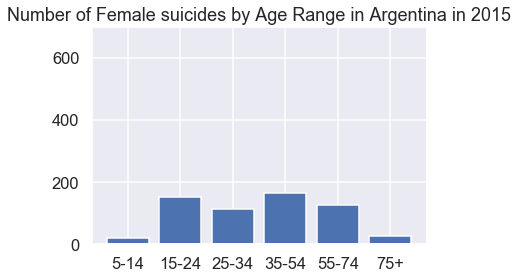

In [22]:
count_female_a = 0
count_female_b = 0
count_female_c = 0
count_female_d = 0
count_female_e = 0
count_female_f = 0

#df_sex
df_female_ARG = df_sex_argentina[df_sex_argentina['sex'] == 'female']

for index, row in df_female_ARG.iterrows():
    if(row['age'] == '75+ years'):
        count_female_f += row['suicides_no']
    elif(row['age'] == '55-74 years'):
        count_female_e += row['suicides_no']
    elif(row['age'] == '35-54 years'):
        count_female_d += row['suicides_no']
    elif(row['age'] == '25-34 years'):
        count_female_c += row['suicides_no']
    elif(row['age'] == '15-24 years'):
        count_female_b += row['suicides_no']
    elif(row['age'] == '5-14 years'):
        count_female_a += row['suicides_no']
    else:
        print("fail to find age within range!")
        
#print("count 5-14:", count_female_a, "count 15-24:", count_female_b, "count 25-34:", count_female_c, "count 35-54:", count_female_d, "count 55_74:", count_female_e, "count 75+:", count_female_f)

count_dict = {'Group':['5-14', '15-24', '25-34', '35-54', '55-74', '75+'], 
              'Count':[count_female_a, count_female_b, count_female_c, count_female_d, count_female_e, count_female_f]} 
counts = pd.DataFrame(count_dict)
plt.bar(counts.Group, height = counts.Count)
plt.title("Number of Female suicides by Age Range in Argentina in 2015")
plt.ylim(0, 700)

In [33]:
# GDP vs Suicide Rate
ARG_gdp = df_gdp[df_gdp['country'] == 'Argentina']
year = df_gdp['year'].unique()
print(year)


[1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998
 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012
 2013 2014 2015 2016]


In [12]:
# HDI vs Suicide Rate for 2016